✅ Valid comparisons: 14878
📊 Fraction with real > shuffled: 7887/14878 = 0.530
📈 Bayesian P(real > shuffled): 0.530


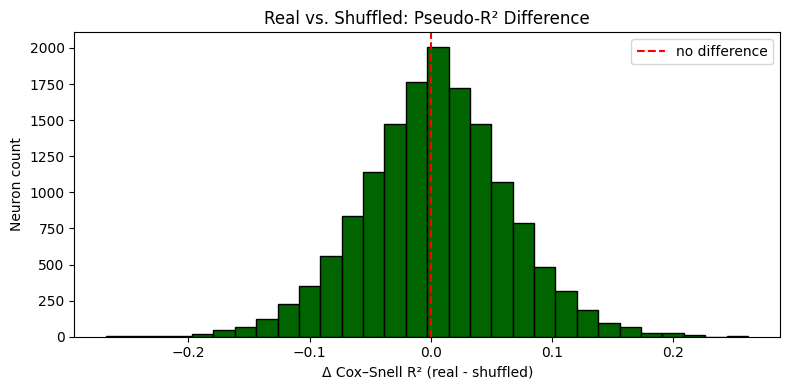

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# --- Load the pickled GLM results ---
with open("glm_binomial_topk_results.pkl", "rb") as f:
    results_real = pickle.load(f)

with open("glm_binomial_topk_shuffled_.pkl", "rb") as f:
    results_shuffled = pickle.load(f)

import pickle
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# --- Load results ---
with open("glm_binomial_topk_results_100.pkl", "rb") as f:
    results_real = pickle.load(f)

with open("glm_binomial_topk_shuffled_100.pkl", "rb") as f:
    results_shuffled = pickle.load(f)

# --- Extract r2 values ---
r2_real = np.array([d.get("r2", None) for d in results_real])
r2_shuf = np.array([d.get("r2", None) for d in results_shuffled])

# --- Filter valid (non-None, positive) entries ---
valid_mask = (~np.isnan(r2_real)) & (~np.isnan(r2_shuf)) & (r2_real > 0) & (r2_shuf > 0)
r2_real_valid = r2_real[valid_mask]
r2_shuf_valid = r2_shuf[valid_mask]

# --- Compute delta R² ---
r2_diff = r2_real_valid - r2_shuf_valid

# --- Bayesian test: P(real > shuffled) ---
k = np.sum(r2_diff > 0)
n = len(r2_diff)
posterior = beta(0.5 + k, 0.5 + (n - k))
p_real_better = posterior.mean()

# --- Print summary ---
print(f"✅ Valid comparisons: {n}")
print(f"📊 Fraction with real > shuffled: {k}/{n} = {k/n:.3f}")
print(f"📈 Bayesian P(real > shuffled): {p_real_better:.3f}")

# --- Plot the histogram of delta R² ---
plt.figure(figsize=(8, 4))
plt.hist(r2_diff, bins=30, color='darkgreen', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='no difference')
plt.xlabel("Δ Cox–Snell R² (real - shuffled)")
plt.ylabel("Neuron count")
plt.title("Real vs. Shuffled: Pseudo-R² Difference")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
ci_low, ci_high = posterior.ppf([0.025, 0.975])
print(f"95% credible interval for P(real > shuffled): [{ci_low:.3f}, {ci_high:.3f}]")

95% credible interval for P(real > shuffled): [0.522, 0.538]
